In [2]:
import pandas as pd
from lifelines impor
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv('../data/ncdatachallenge-2021-v1.csv')
df = pd.read_csv('../data/modified.csv')

In [4]:
# the data is already in the format expected by KaplanMeierFitter: one row for each woman, summarizing the duration of the time
# she was followed for and the final outcome

In [5]:
# Prepare the data in the format expected by KaplanMeierFitter
time = df['n_cycles_trying']
event = df['outcome'].apply(lambda x: 1 if x == 'pregnant' else 0)
n_cycles = 13
# Fit
kmf = KaplanMeierFitter()
kmf.fit(durations=time, event_observed=event)

# Survival function at 13 cycles and confidence interval
surv_13 = kmf.survival_function_at_times(n_cycles)
# CI is built with Greenwood’s Exponential formula (log-minus-log)
ci_surv_13 = kmf.confidence_interval_.loc[n_cycles] if n_cycles in kmf.confidence_interval_.index else kmf.confidence_interval_.interpolate().loc[n_cycles]
pregnancy_prob_13 = 1 - surv_13.values[0]

# Print results
print(f"Probability of pregnancy within {n_cycles} cycles: {1 - surv_13.values[0]:.2%}")
print(f"95% CI: [{1 - ci_surv_13.iloc[1]:.2%}, {1 - ci_surv_13.iloc[0]:.2%}]")



Probability of pregnancy within 13 cycles: 74.92%
95% CI: [72.31%, 77.45%]


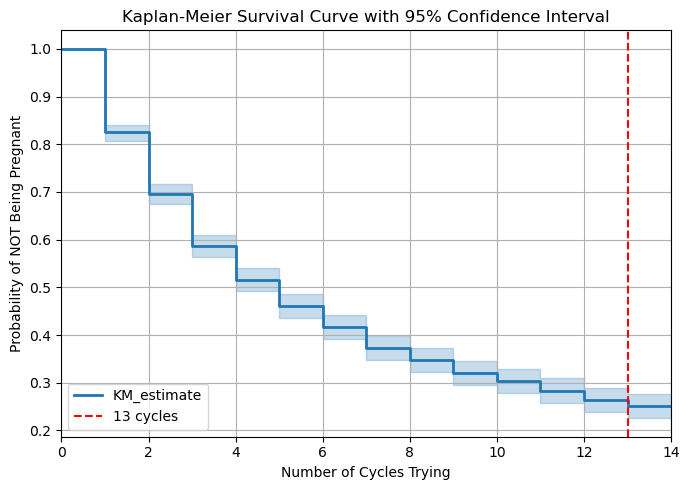

In [21]:
# Plot results
plt.figure(figsize=(7, 5))
kmf.plot_survival_function(ci_show=True, linewidth=2)

# Add vertical line at 13 cycles
plt.axvline(13, color='red', linestyle='--', label='13 cycles')
# Annotate survival and pregnancy prob
# plt.text(13 + 0.5, surv_13, f"{pregnancy_prob_13:.1%} pregnancy probability", color='red', va='bottom')

# Titles and labels
plt.title("Kaplan-Meier Survival Curve with 95% Confidence Interval")
plt.xlabel("Number of Cycles Trying")
plt.ylabel("Probability of NOT Being Pregnant")
plt.xlim(0, 14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/Q1_survival_curve.jpg')
plt.show()

# chiara: note: stop graph at 14 cycles

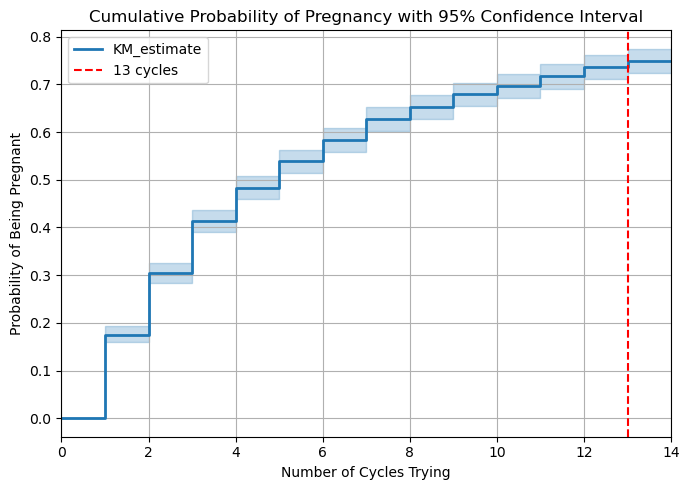

In [23]:
# We can do the same also using the cumulative density, wich gives directly the probability

# Cumulative density and confidence intervals
cdf = kmf.cumulative_density_
ci_cdf = kmf.confidence_interval_cumulative_density_

cdf_13 = cdf.loc[13].values[0]
ci_cdf_13 = ci_cdf.loc[13]
lower_ci_cdf_13 = ci_cdf_13.iloc[0]
upper_ci_cdf_13 = ci_cdf_13.iloc[1]

# Plot cumulative density 
plt.figure(figsize=(7, 5))
kmf.plot_cumulative_density(ci_show=True, linewidth=2)

# Add vertical line at 13 cycles
plt.axvline(13, color='red', linestyle='--', label='13 cycles')
#plt.text(13 + 0.5, cdf_13, f"{cdf_13:.1%} pregnancy probability", color='red', va='bottom')

# Titles and labels
plt.title("Cumulative Probability of Pregnancy with 95% Confidence Interval")
plt.xlabel("Number of Cycles Trying")
plt.ylabel("Probability of Being Pregnant")
plt.xlim(0, 14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../plots/Q1_pregnancy_probability.jpg')
plt.show()

In [10]:
# Median number of cycles to prengnancy
# this takes into account properly censoring (women who did not achieve pregnancy)
# non-pregnant women are treated as right-censored
median_time_to_pregnancy = kmf.median_survival_time_

print(f"Median number of cycles to pregnancy: {median_time_to_pregnancy:.1f}")

"""
Note: this is a median, not a mean. Use median for individual guidance and mean for aggregate projections (e.g. when designing policies).
In this case the median is more sensible as it's less sensitive to outliers and more suited for individual guidance.
In the case of a survival curve mean is more complicatd.
"""

Median number of cycles to pregnancy: 5.0


"\nNote: this is a median, not a mean. Use median for individual guidance and mean for aggregate projections (e.g. when designing policies).\nIn this case the median is more sensible as it's less sensitive to outliers and more suited for individual guidance.\nIn the case of a survival curve mean is more complicatd.\n"